In [1]:
from util import *
from generation import *
from swarm import *
from metrics import *
from position_export import *
from swarm_types import *

import random
import time
from IPython import display
import pylab as pl


In [2]:
conciliation_quota  = 0.5

critical_amount     = 100

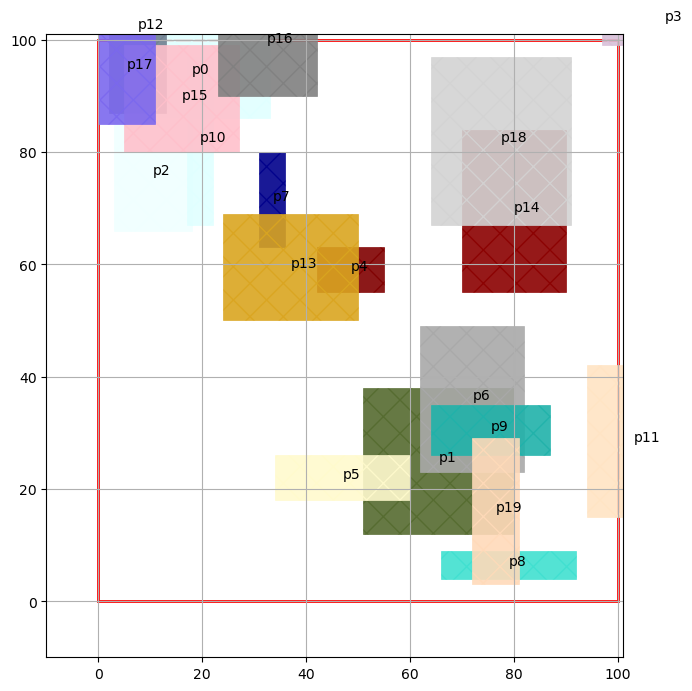

In [3]:
# #Random small
# layout_zone         = {"xmin"   : 0, "ymin"   : 0, "width"  : 70, "height" : 70}
# participants        = generate_unconnected_participants(10, layout_zone, 30, 30, 666)
# ds_goal             = 20.0

#Random
layout_zone         = Rectangle(0,0,100,100)    #{"xmin"   : 0, "ymin"   : 0, "width"  : 100, "height" : 100}
participants        = generate_unconnected_participants(20, layout_zone, 30, 30, 420)
ds_goal             = 15.0

# #Random with nets
# layout_zone         = {"xmin"   : 0, "ymin"   : 0, "width"  : 80, "height" : 80}
# participants        = generate_connected_participants(10, 5, 3, layout_zone, 30, 30, 69)    # {"xmin"   : 0, "ymin"   : 0, "width"  : 80, "height" : 80} + (10, 5, 3, layout_zone, 30, 30, 69)-> Oscillation
# ds_goal             = 13.0

# # Perfect square
# layout_zone         = {"xmin"   : 0, "ymin"   : 0, "width"  : 100, "height" : 100}
# participants        = generate_unconnected_equal_quadratic_participants(9, layout_zone, 31, 420)
# ds_goal             = 0.48

# # Wheel
# layout_zone         = {"xmin"   : 0, "ymin"   : 0, "width"  : 300, "height" : 300}
# participants        = generate_unconnected_wheel_participants(layout_zone, 100, 999) 
# ds_goal             = 0.48

# # Zone filling participants
# layout_zone         = {"xmin"   : 0, "ymin"   : 0, "width"  : 100, "height" : 100}
# participants        = generate_unconnected_zone_filling_participants(5, 3, layout_zone, 777)
# ds_goal             = 0.48
# layout_zone         = {"xmin"   : 0, "ymin"   : 0, "width"  : 200, "height" : 200}  # Overwrite layout zone used for generation to allow room for movement


plot_size           = 1.01 * layout_zone.width


a = plot_participants(layout_zone, participants, plot_size, plot_size, plot_connections= True)


In [4]:
participants            = determine_initial_conditions(participants, layout_zone, conciliation_quota, critical_amount)

print('Participant Area: ' + str(calculate_all_participants_area(participants)))

Participant Area: 7087


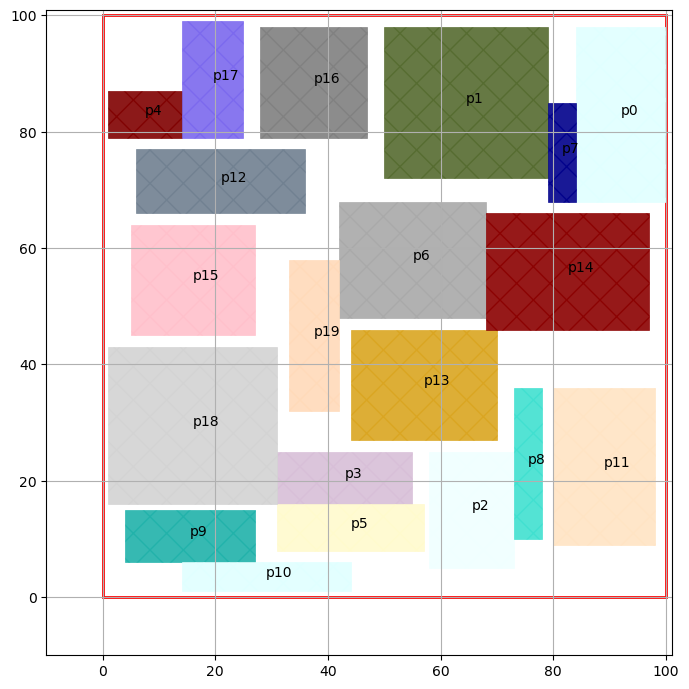

One Round of Interaction took: 0.47310423851013184 seconds


AttributeError: 'tuple' object has no attribute 'p1'

In [5]:
tic = time.time()

for i in range(500): # maximum rounds of interaction

    participants, runtime    = one_round_of_interaction(participants, layout_zone, 'interference', conciliation_quota, critical_amount)

    plot_participants(layout_zone, participants, plot_size, plot_size, plot_connections=True)

    print('One Round of Interaction took: ' + str(runtime) + ' seconds')

    last_moves = [p.last_move for p in participants]

    #print(participants['0']['interference'])
    #print(participants['0']['relaxed-connections'])
    #print(last_moves)

    if last_moves.count('linger')  == len(participants):    

        ds = calculate_dead_space(participants, layout_zone)  

        #print('Current deadspace : ' + str(ds) + ' %') 

        if ds < ds_goal:
            break

        layout_zone         = scale_layout_zone(layout_zone, 0.99) 

        participants        = reset_after_tightening(participants)

    # for i in range(len(participants)):
    #     print(participants[str(i)]['last-move'])

toc = time.time()

In [ ]:
print('This took ' + str(toc-tic)  + ' seconds!')

In [ ]:
participants    	= determine_initial_conditions(participants, layout_zone, conciliation_quota, critical_amount)

for i in range(len(participants)):
    print(participants[str(i)]['overlap-with-idx'])

In [ ]:
ds = calculate_dead_space(participants, layout_zone)

print("Dead Space: " + str(ds) + " %")

In [ ]:
# # Export to csv

# positions2csv(participants, layout_zone)

In [ ]:
# from matplotlib import colors

# import pandas as pd

# df = pd.DataFrame.from_dict(participants, orient = 'index')

# df['color_hex'] = [colors.to_hex(x) for x in list(df['color'].values)]

# df